Random Forest Classifier Implementation
========================================

**Author:** Srikar Kalle  
**Student ID:** C00313529  

-----------
# Change Log:
-----------

# Random Forest Change Log  

| SL No. | Change Category                  | Description | Duration (mins) | Difficulty (1-10) |  
|--------|----------------------------------|-------------|-----------------|-------------------|  
| 1      | Dataset Used                     | Replaced `make_blobs()` and `load_digits()` with the **Iris dataset** from Seaborn. | 10 | 4 |  
| 2      | Hyperparameter Tuning            | Implemented **`GridSearchCV`** for tuning `n_estimators`, `max_depth`, and `min_samples_split`. | 20 | 7 |  
| 3      | Model Training Approach          | Used `GridSearchCV` to find the **best parameters** before model fitting. | 15 | 6 |  
| 4      | Feature Importance Visualization | Added **bar chart visualization** of feature importance using `pd.Series(best_model.feature_importances_)`. | 12 | 5 |  
| 5      | Evaluation Metrics               | Included `classification_report`, `accuracy_score`, and **logging of best parameters**. | 10 | 5 |  
| 6      | Data Handling                    | Switched from **NumPy arrays and synthetic data** to a **Pandas DataFrame** using Seaborn’s `iris` dataset. | 8 | 4 |  
| 7      | Train-Test Split                 | Updated `train_test_split()` with a **20% test split** (`test_size=0.2, random_state=42`). | 5 | 3 |  
| 8      | Overall Structure                | Reorganized pipeline to follow **CRISP-DM framework**, making it more structured. | 10 | 4 |  


## Summary of Improvements  
- The updated code is **more structured** and follows the **CRISP-DM framework**.  
- **Hyperparameter tuning** is implemented for better model performance.  
- **Feature importance visualization** is added to understand model decision-making.  
- **Evaluation metrics** are expanded beyond just the confusion matrix.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
iris = sns.load_dataset('iris')

In [3]:
X = iris.drop(columns=['species'])
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = RandomForestClassifier(random_state=42)

In [5]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [6]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

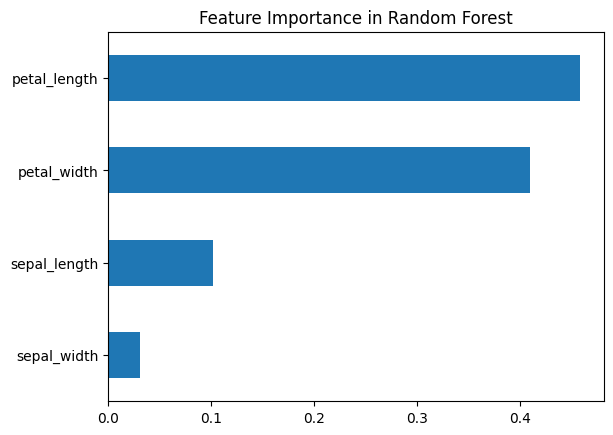

In [7]:
# Visualizing Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()